## Example Code for Interval K-means

In [1]:
from interClusLib.IntervalData import *
from interClusLib.preprocessing import MinMaxNormalizer
from interClusLib.clustering.IntervalKMeans import IntervalKMeans
from interClusLib.visualization import Interval3d, IntervalParallelCoordinates
from interClusLib.evaluation import *
from interClusLib.cluster_number_analysis import *

In [2]:
clustered_data = IntervalData.from_csv('ChinaModified.csv')

In [3]:
from interClusLib.preprocessing import InvertedIntervalHandler, MissingValueImputor

handler = InvertedIntervalHandler()

handler.check_intervals(clustered_data)

{'has_inverted': True,
 'total_inverted': 17,
 'inverted_by_feature': {'Season_1': 5, 'Season_3': 6, 'Season_4': 6},
 'inverted_rows': [19, 42, 62, 67, 98, 105],
 'inverted_details': [{'row': 42,
   'feature': 'Season_1',
   'lower_column': 'Season_1_lower',
   'upper_column': 'Season_1_upper',
   'lower_value': -2.29504089060665,
   'upper_value': -18.9049591093933,
   'difference': 16.60991821878665},
  {'row': 62,
   'feature': 'Season_1',
   'lower_column': 'Season_1_lower',
   'upper_column': 'Season_1_upper',
   'lower_value': 10.0037421782143,
   'upper_value': -13.8037421782143,
   'difference': 23.8074843564286},
  {'row': 67,
   'feature': 'Season_1',
   'lower_column': 'Season_1_lower',
   'upper_column': 'Season_1_upper',
   'lower_value': 10.5445954396213,
   'upper_value': -18.2445954396213,
   'difference': 28.7891908792426},
  {'row': 98,
   'feature': 'Season_1',
   'lower_column': 'Season_1_lower',
   'upper_column': 'Season_1_upper',
   'lower_value': 10.906746971521

In [4]:
fixed_data = handler.fix_inverted_intervals(
        clustered_data, 
        action='swap',  # 或 'remove', 'set_nan', 'set_equal'
        inplace=False   # 返回新的副本，不修改原数据
    )

Swapped bounds for 17 inverted intervals.


In [5]:
imputor = MissingValueImputor()

imputor.check_missing_values(fixed_data)

fixed_data = imputor.fix_missing_values(interval_data=fixed_data, action= 'fill_mean')

minmax = MinMaxNormalizer(feature_range=(0,1))

normalized_data = minmax.fit_transform(fixed_data)

Filled 51 missing values with mean.


In [6]:
kmeans = IntervalKMeans(n_clusters=3, max_iter=1000, distance_func='hedjazi', random_state=43)

kmeans.fit(normalized_data.get_intervals())

In [7]:
print(kmeans.centroids_)
print(kmeans.get_labels())

[[[0.70790611 0.90066092]
  [0.54659987 0.88613925]
  [0.59485388 0.92456031]
  [0.71529776 0.89654127]]

 [[0.29206241 0.65995223]
  [0.1994715  0.76126957]
  [0.18580955 0.76062778]
  [0.28247725 0.53560099]]

 [[0.53846172 0.801478  ]
  [0.38632827 0.81915736]
  [0.44048559 0.82884721]
  [0.55429594 0.73970972]]]
[1 0 2 2 2 0 1 2 0 0 0 2 1 1 1 2 1 1 2 0 2 2 1 0 1 0 1 0 1 2 2 0 2 0 2 2 2
 0 2 2 1 1 1 2 0 2 1 1 1 2 2 0 0 1 2 2 1 1 2 2 2 2 1 2 0 1 1 1 0 2 1 2 1 1
 1 2 1 1 1 2 1 1 2 2 2 2 1 0 1 2 2 2 2 1 2 2 2 0 2 2 1 2 1 2 1 1 2 2 0 1 0
 1 1 1 0 2 2 2 1 2 0 1 1 2 2 2 1 0 2 2 0 1 1 0 1]


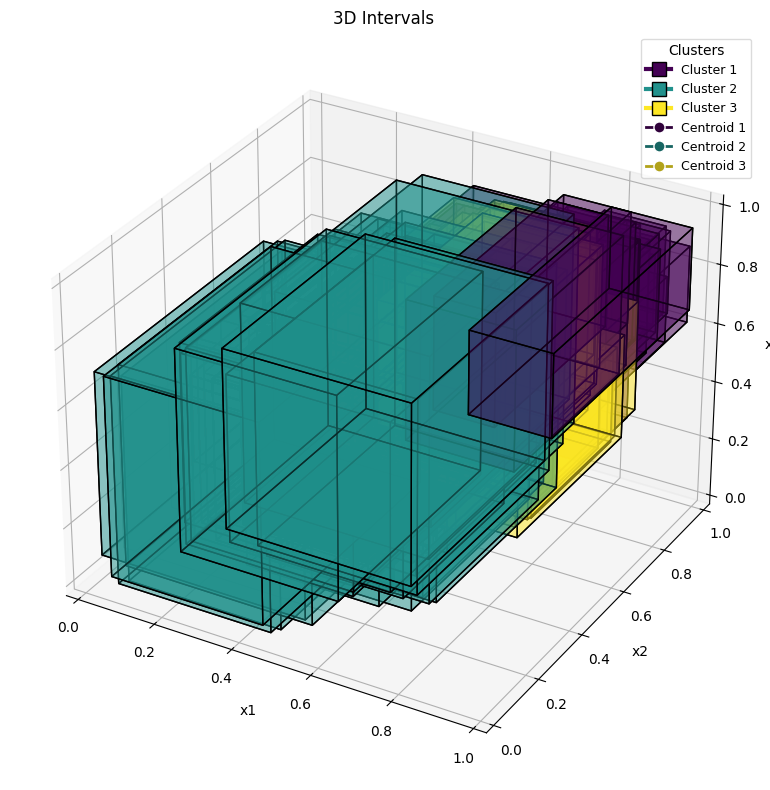

In [8]:
fig, ax = Interval3d.visualize(intervals=normalized_data.get_intervals(), labels=kmeans.labels_, centroids=kmeans.centroids_, margin=0.01)

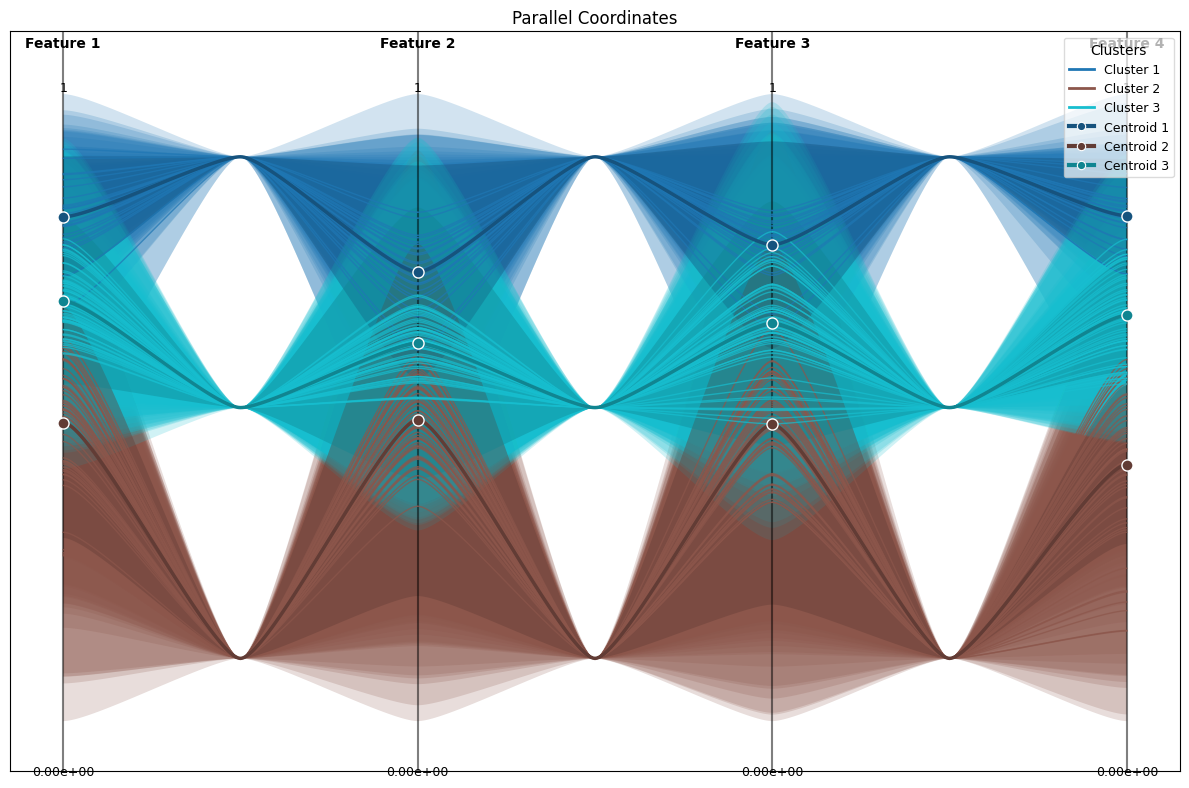

In [9]:
fig, ax = IntervalParallelCoordinates.visualize(intervals=normalized_data.get_intervals(), labels=kmeans.labels_, centroids=kmeans.centroids_, beta= 1)

In [ ]:
metric_results = kmeans.compute_metrics_for_k_range(
    normalized_data.get_intervals(),
    min_clusters=2,
    max_clusters=10,
    metrics=['distortion', 'silhouette', 'davies_bouldin','calinski_harabasz','dunn'],
)

print(metric_results)

Computing metrics for k=2...
Computing metrics for k=3...
Computing metrics for k=4...
Computing metrics for k=5...
Computing metrics for k=6...
Computing metrics for k=7...
Computing metrics for k=8...
Computing metrics for k=9...
Computing metrics for k=10...
{'distortion': {2: 0.0404271525257498, 3: 0.026335020217759745, 4: 0.021827863561883657, 5: 0.018634782098583887, 6: 0.01572049119699989, 7: 0.014505921526309204, 8: 0.01311386228865775, 9: 0.012222474862354553, 10: 0.011468490616953422}, 'silhouette': {2: 0.35413215167488765, 3: 0.36048181561450743, 4: 0.29882315553704114, 5: 0.286499719049619, 6: 0.3215350112609539, 7: 0.2746280912324687, 8: 0.28598182171516806, 9: 0.2571629472026799, 10: 0.292546278392527}, 'davies_bouldin': {2: 0.9390374346725643, 3: 0.9168943984006197, 4: 1.0116105907382473, 5: 1.1614778994251338, 6: 1.0126567189611357, 7: 1.0614742796464933, 8: 1.1685225669488473, 9: 1.206956963033129, 10: 1.2001863380107147}, 'calinski_harabasz': {2: 197.97362641343616, 3

L Method optimal k: 3
Elbow Method optimal k: 3


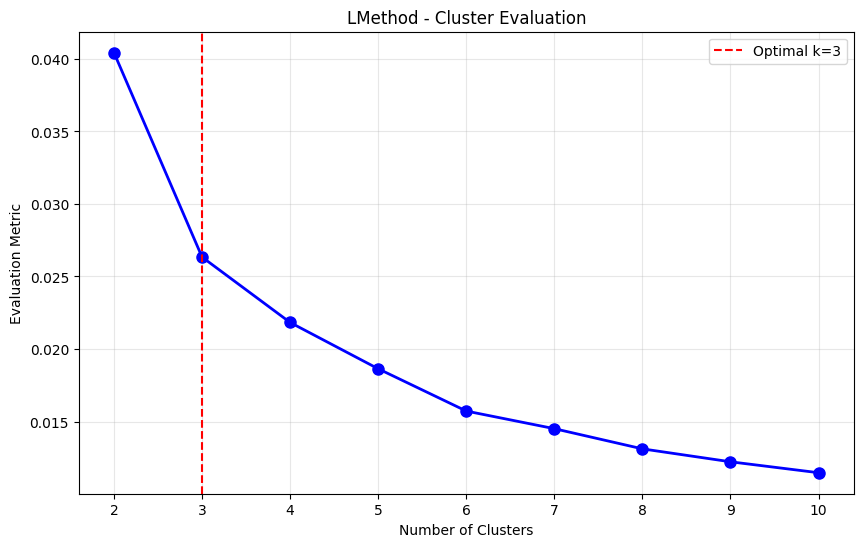

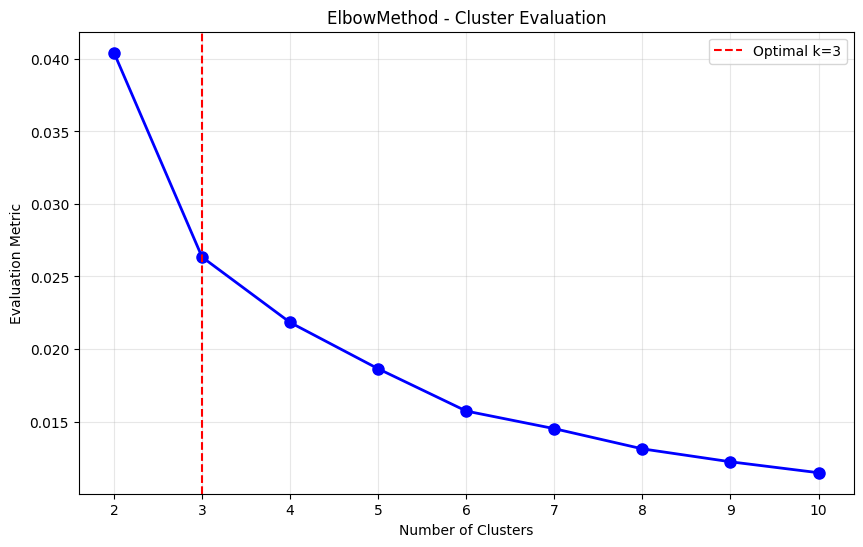

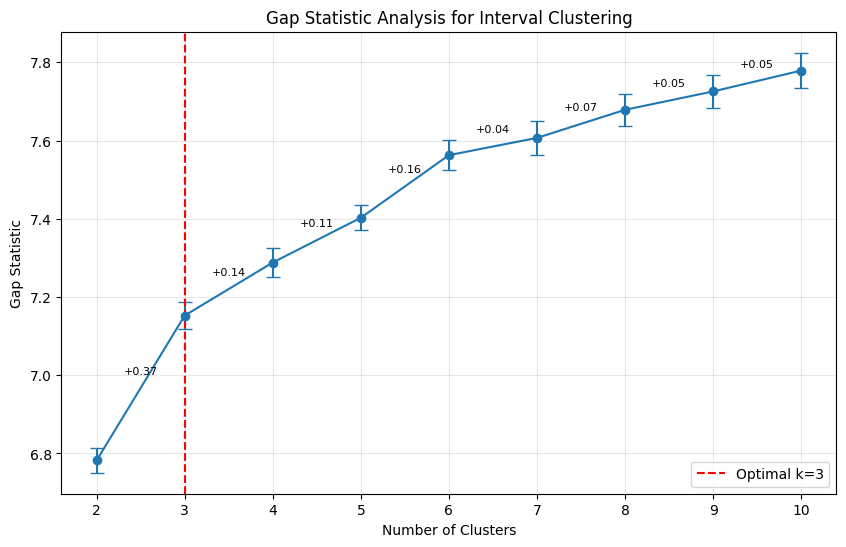

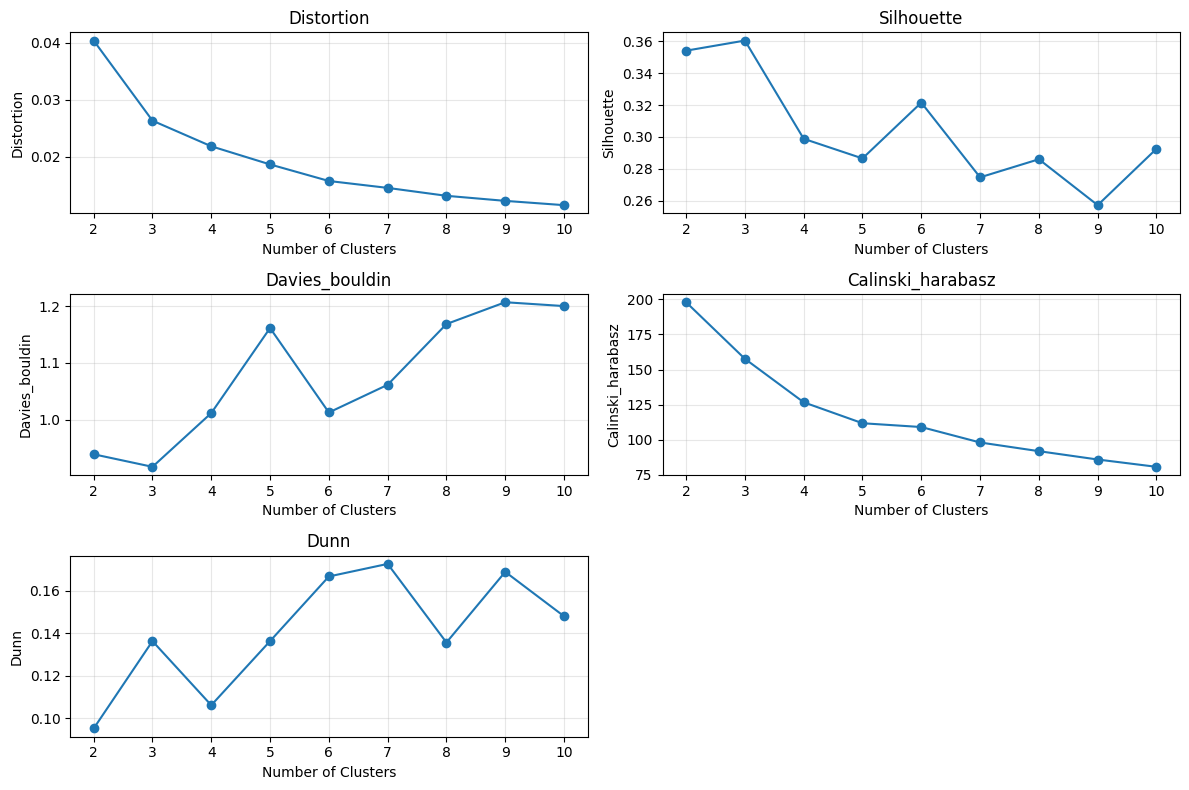

In [13]:
# L-method
l_method = LMethod(min_clusters=2, max_clusters=10)
optimal_k_l = l_method.evaluate(metric_results['distortion'])
plt = l_method.plot()
print(f"L Method optimal k: {optimal_k_l}")

# Elbow method
elbow = ElbowMethod(min_clusters=2, max_clusters=10, second_derivative= True)
optimal_k_elbow = elbow.evaluate(metric_results['distortion'])
print(f"Elbow Method optimal k: {optimal_k_elbow}")
plt = elbow.plot()

def cluster(intervals, k):
    return kmeans.cluster_and_return(intervals, k)

# GapStatistic
gap_evaluator = GapStatistic(min_clusters=2, max_clusters=15, n_refs=10)

data = normalized_data.get_intervals()

optimal_k = gap_evaluator.evaluate(
    eval_data=metric_results['distortion'],
    raw_data=data,
    cluster_func=cluster
)

# visualize
gap_evaluator.plot_gap()
plt.title("Gap Statistic Analysis for Interval Clustering")
plt.show()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for i, (metric_name, values) in enumerate(metric_results.items(), 1):
    plt.subplot(3, 2, i)
    x = list(values.keys())
    y = list(values.values())
    plt.plot(x, y, 'o-')
    plt.title(f"{metric_name.capitalize()}")
    plt.xlabel("Number of Clusters")
    plt.ylabel(metric_name.capitalize())
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()